<a href="https://colab.research.google.com/github/tejaguduri017-png/guduri-teja/blob/main/Data_analysis_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ==========================================
# Stress–Strain Analysis using Pandas
# ==========================================

# 1. Import required libraries
import pandas as pd

# 2. Load the CSV file
# Make sure the file "stress_strain_practice.csv" is uploaded to Colab
df = pd.read_csv("stress_strain_practice.csv")

# 3. Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())

# 4. Calculate Stress (MPa)
# Stress = Force (N) / Cross-sectional Area (mm^2)
# Note: N/mm^2 is equivalent to MPa
df["Stress_MPa"] = df["Force_N"] / df["Cross_Section_Area_mm2"]

# 5. Calculate Strain (%)
# Strain (%) = (Elongation / Original Length) * 100
df["Strain_percent"] = (df["Elongation_mm"] / df["Original_Length_mm"]) * 100

# 6. Group by Material and calculate average Stress and Strain
material_avg = df.groupby("Material").agg(
    Average_Stress_MPa=("Stress_MPa", "mean"),
    Average_Strain_percent=("Strain_percent", "mean")
)

print("\nAverage Stress and Strain by Material:")
display(material_avg)

# 7. Identify the strongest material (highest average stress)
strongest_material = material_avg["Average_Stress_MPa"].idxmax()
highest_stress = material_avg["Average_Stress_MPa"].max()

print(f"\nStrongest Material: {strongest_material}")
print(f"Highest Average Stress: {highest_stress:.2f} MPa")

# 8. Create a summary showing min, max, and average stress for each material
stress_summary = df.groupby("Material")["Stress_MPa"].agg(
    Min_Stress_MPa="min",
    Max_Stress_MPa="max",
    Avg_Stress_MPa="mean"
)

print("\nStress Summary (Min, Max, Average) by Material:")
display(stress_summary)

# 9. Merge summaries into one final results table
final_results = material_avg.merge(stress_summary, on="Material")

# 10. Export results to a new CSV file
output_file = "stress_strain_summary_results.csv"
final_results.to_csv(output_file, index=True)

print(f"\nResults successfully exported to '{output_file}'")


First 5 rows of the dataset:


,Test_ID,Material,Force_N,Cross_Section_Area_mm2,Elongation_mm,Original_Length_mm,Test_Date
0,T001,Steel,1749,27,0.51,100,2025-01-01
1,T002,Aluminum,2901,20,0.45,100,2025-01-02
2,T003,Copper,2463,19,0.76,100,2025-01-03
3,T004,Brass,2197,33,0.50,100,2025-01-04
4,T005,Titanium,1312,33,0.45,100,2025-01-05



Average Stress and Strain by Material:


,Average_Stress_MPa,Average_Strain_percent
Material,,
Aluminum,83.776627,0.550000
Brass,72.805132,0.535000
Copper,107.466696,0.545000
Steel,59.954850,0.630000
Titanium,65.957533,0.561667



Strongest Material: Copper
Highest Average Stress: 107.47 MPa

Stress Summary (Min, Max, Average) by Material:


,Min_Stress_MPa,Max_Stress_MPa,Avg_Stress_MPa
Material,,,
Aluminum,42.600000,145.050000,83.776627
Brass,44.500000,121.333333,72.805132
Copper,48.000000,148.000000,107.466696
Steel,43.700000,80.312500,59.954850
Titanium,39.757576,96.640000,65.957533



Results successfully exported to 'stress_strain_summary_results.csv'


First 5 rows of the dataset:


,Test_ID,Material,Force_N,Cross_Section_Area_mm2,Elongation_mm,Original_Length_mm,Test_Date
0,T001,Steel,1749,27,0.51,100,2025-01-01
1,T002,Aluminum,2901,20,0.45,100,2025-01-02
2,T003,Copper,2463,19,0.76,100,2025-01-03
3,T004,Brass,2197,33,0.50,100,2025-01-04
4,T005,Titanium,1312,33,0.45,100,2025-01-05



Missing values in each column:


,0
Test_ID,0
Material,0
Force_N,0
Cross_Section_Area_mm2,0
Elongation_mm,0
Original_Length_mm,0
Test_Date,0



⚠️ Tests where Stress exceeded 200 MPa:


,Test_ID,Material,Force_N,Cross_Section_Area_mm2,Elongation_mm,Original_Length_mm,Test_Date,Stress_MPa,Strain_percent


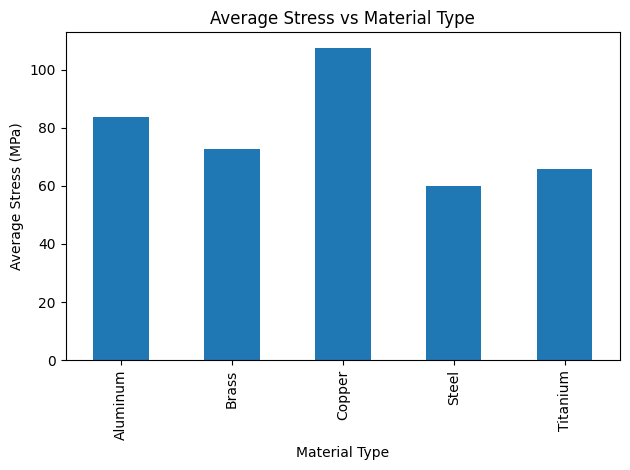


✅ Export completed:
- tests_with_stress_above_200MPa.csv


In [3]:
# ==========================================
# Stress–Strain Analysis with Visualization
# Highlighting and Error Handling
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the CSV file with error handling
try:
    df = pd.read_csv("stress_strain_practice.csv")
except FileNotFoundError:
    raise FileNotFoundError(
        "File not found. Please upload 'stress_strain_practice.csv' to Google Colab."
    )

# 2. Display first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# 3. Check for missing values
print("\nMissing values in each column:")
display(df.isnull().sum())

# 4. Handle missing values
# Drop rows with missing critical data
required_columns = [
    "Material",
    "Force_N",
    "Cross_Section_Area_mm2",
    "Elongation_mm",
    "Original_Length_mm"
]

df_clean = df.dropna(subset=required_columns)

# Prevent division by zero
df_clean = df_clean[df_clean["Cross_Section_Area_mm2"] > 0]
df_clean = df_clean[df_clean["Original_Length_mm"] > 0]

# 5. Calculate Stress (MPa) and Strain (%)
# Note: N/mm² = MPa
df_clean["Stress_MPa"] = df_clean["Force_N"] / df_clean["Cross_Section_Area_mm2"]
df_clean["Strain_percent"] = (
    df_clean["Elongation_mm"] / df_clean["Original_Length_mm"]
) * 100

# 6. Highlight tests where stress exceeded 200 MPa
high_stress_tests = df_clean[df_clean["Stress_MPa"] > 200]

print("\n⚠️ Tests where Stress exceeded 200 MPa:")
display(high_stress_tests)

# 7. Group by Material and calculate average stress
material_avg_stress = df_clean.groupby("Material")["Stress_MPa"].mean()

# 8. Visualization: Bar chart (Stress vs Material Type)
plt.figure()
material_avg_stress.plot(kind="bar")
plt.xlabel("Material Type")
plt.ylabel("Average Stress (MPa)")
plt.title("Average Stress vs Material Type")
plt.tight_layout()
plt.show()

# 9. Export highlighted tests to CSV
high_stress_tests.to_csv("tests_with_stress_above_200MPa.csv", index=False)

print("\n✅ Export completed:")
print("- tests_with_stress_above_200MPa.csv")


# New Section